In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

from sklearn.metrics import mean_squared_error

In [2]:
power_train = pd.read_csv('./datasets/power_train.csv', index_col=0)
power_train.index = pd.DatetimeIndex(power_train.index, freq='H')

power_val_target = pd.read_csv('./datasets/power_val_target.csv', index_col=0)
power_val_target.index = pd.DatetimeIndex(power_val_target.index)

power_val_benchmark = pd.read_csv('./datasets/power_val_benchmark.csv', index_col=0)
power_val_benchmark.index = pd.DatetimeIndex(power_val_benchmark.index)

# restrict analysis to one wind farm

wp1_train = power_train['wp1']
wp1_val_target = power_val_target['wp1']
wp1_val_benchmark = power_val_benchmark['wp1']

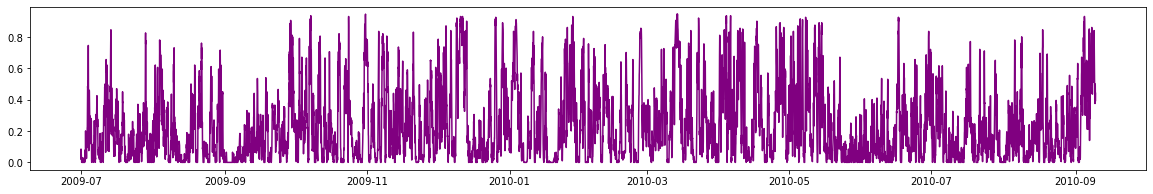

In [4]:
plt.figure(figsize = (20,3))
plt.plot(wp1_train.index, wp1_train.values, c='purple');

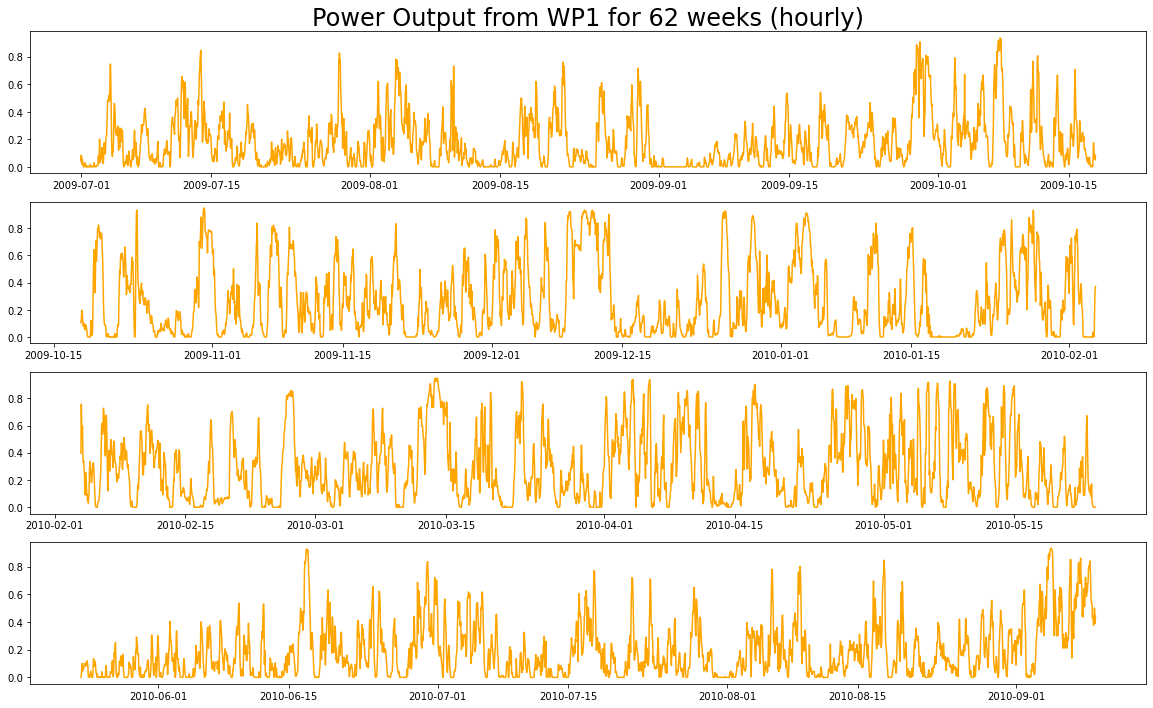

In [6]:
num_intervals = 4
len_interval = int(np.ceil(len(wp1_train)/4))

fig, ax = plt.subplots(num_intervals,1,figsize = (20, 3*num_intervals))
for i in range(num_intervals):
    ax[i].plot(wp1_train.index[i*len_interval:(i+1)*len_interval], wp1_train.values[i*len_interval:(i+1)*len_interval], c='orange')

ax[0].set_title('Power Output from WP1 for 62 weeks (hourly)', fontsize = 24);

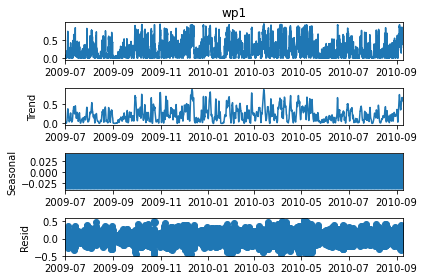

In [10]:
decomp = seasonal_decompose(wp1_train)
decomp.plot();

In [11]:
# check for stationarity

# Dickey-Fuller test:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(wp1_train)
dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic   -1.352802e+01
p-value           2.655061e-25
dtype: float64


In [12]:
# calculate baseline RMSE to provide a target for models
base_RMSE = mean_squared_error(y_true = wp1_val_target, y_pred = wp1_val_benchmark)**0.5
print('Baseline RMSE:', base_RMSE)

Baseline RMSE: 0.31448552459897366
